# Project 4: Data Cleaning 

In [175]:
# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [176]:
# Import graph style
plt.style.use('fivethirtyeight')

In [177]:
# Set the max rows and columns for Pandas
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

In [178]:
# Read the data
train = pd.read_csv('./assets/train.csv')
test = pd.read_csv('./assets/test.csv')
spray = pd.read_csv('./assets/spray.csv')
weather = pd.read_csv('./assets/weather.csv')

In [179]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [180]:
# Shape of the train data
train.shape

(10506, 12)

In [181]:
# Columns
train.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

In [182]:
# No null values
train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

# Weather dataset cleaning

In [183]:
# Get the first 5
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [184]:
# Shape of the weather dataset
weather.shape

(2944, 22)

In [185]:
# Describing the dataset
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [186]:
# Check for null values
weather.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [187]:
# Filtering out columns with 'M', missing data
missing_data_cols = weather[weather == 'M'].notnull().sum()[weather[weather == 'M'].notnull().sum() > 0].index
missing_data_cols

Index(['Tavg', 'Depart', 'WetBulb', 'Heat', 'Cool', 'Depth', 'Water1',
       'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'AvgSpeed'],
      dtype='object')

In [188]:
# Number of values with 'M' for each column
weather[weather == 'M'].notnull().sum()[weather[weather == 'M'].notnull().sum() > 0].sort_values(ascending=False)

Water1         2944
SnowFall       1472
Depth          1472
Depart         1472
Cool             11
Heat             11
Tavg             11
SeaLevel          9
StnPressure       4
WetBulb           4
AvgSpeed          3
PrecipTotal       2
dtype: int64

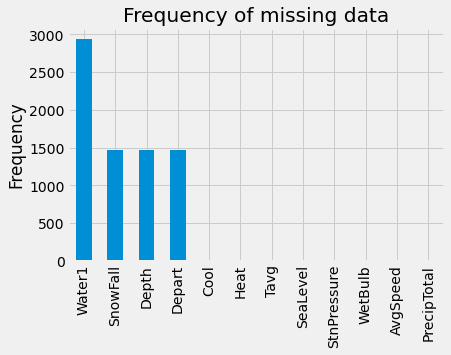

In [189]:
weather[weather == 'M'].notnull().sum()[weather[weather == 'M'].notnull().sum() > 0].sort_values(ascending=False).plot(kind='bar')

plt.title('Frequency of missing data')
plt.ylabel('Frequency');

`Water1` has the highest missing values.

In [190]:
# Water1 has all missing values, drop it
weather['Water1'].unique()

array(['M'], dtype=object)

In [191]:
# Departure from the normal temperature, 1/2 of it has missing values, drop
weather['Depart'].value_counts(normalize=True)[:5]

M     0.500000
 2    0.031590
-1    0.028533
-2    0.027174
 5    0.026155
Name: Depart, dtype: float64

In [192]:
# SnowFall has half of it is missing, dropping
weather['SnowFall'].value_counts(normalize=True)

M      0.500000
0.0    0.495584
  T    0.004076
0.1    0.000340
Name: SnowFall, dtype: float64

In [193]:
# Depth, refers to the Snow depth, 1/2 of it is missing values, can drop them as it's 0 for half and missing for half
weather['Depth'].value_counts(normalize=True)

M    0.5
0    0.5
Name: Depth, dtype: float64

**What is Trace? (T)**

In meteorology, a trace denotes an amount of precipitation, such as rain or snow, that is greater than zero, but is too small to be measured by standard units or methods of measurement. The designation of a trace rather than zero is used to indicate that precipitation did fall, but not enough to be measured reliably.

In [194]:
# There is a value of  '  T', impute them with mean values
weather['PrecipTotal'].value_counts(normalize=True)[:5].index

Index(['0.00', '  T', '0.01', '0.02', '0.03'], dtype='object')

In [195]:
# PrecipTotal has Trace values, about 10% of it has missing values, imput with median values?
weather['PrecipTotal'].value_counts(normalize=True)[:5]

0.00    0.535666
  T     0.108016
0.01    0.043139
0.02    0.021399
0.03    0.015625
Name: PrecipTotal, dtype: float64

In [196]:
# '-' columns with null values, Sunrise and Sunset
weather[weather == '-'].notnull().sum()[weather[weather == '-'].notnull().sum() > 0]

Sunrise    1472
Sunset     1472
dtype: int64

In [197]:
# Sunrise: Half of it is missing
weather['Sunrise'].value_counts(normalize=True)[:5]

-       0.500000
0416    0.035326
0417    0.021739
0419    0.013587
0425    0.010870
Name: Sunrise, dtype: float64

In [198]:
# Sunset: Half of it is missing
weather['Sunset'].value_counts(normalize=True)[:5]

-       0.500000
1931    0.032609
1930    0.019022
1929    0.016304
1927    0.010870
Name: Sunset, dtype: float64

In [206]:
# CodeSum has ' ' values
weather[weather == ' '].notnull().sum()[weather[weather == ' '].notnull().sum() > 0]

CodeSum    1609
dtype: int64

In [210]:
weather['CodeSum'].value_counts(normalize=True)[:5]

              0.546535
RA            0.100543
RA BR         0.080842
BR            0.037364
TSRA RA BR    0.031250
Name: CodeSum, dtype: float64

`CodeSum` refers to the **weather-types**. Half of it is missing.  E.g: RA stands for Rain.

Can impute as `None`

`Sunrise` and `Sunset` has half of it has missing values. Can drop both columns as may not be useful in detecting the virus

## Summary of missing data
The following columns will be dropped due to too many missing values
* Water1 (All of it has missing values)
* Depart, (Departed Temperature) (1/2 of it has missing values)
* SnowFall (1/2 of it has missing values)
* Depth (Snowfall Depth) (Depth, refers to the Snow depth, 1/2 of it is missing values, can drop them as it's 0 for half and missing for half)
* Sunrise (1/2 of it has missing values)
* Sunset (1/2 of it has missing values)
* CodeSum (1/2 of it has missing values) (Refers to the weather type)

The others can be imputed
* Cool
* Heat
* Tavg
* SeaLevel
* StnPressure
* WetBulb
* AvgSpeed
* PrecipTotal
* Trace

In [113]:
weather = weather.drop(['Water1', 'Depart', 'SnowFall', 'Depth'], axis=1)
weather

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,51,56,0,2,0448,1849,,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,51,57,0,3,-,-,,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,42,47,14,0,0447,1850,BR,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,42,47,13,0,-,-,BR HZ,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,40,48,9,0,0446,1851,,0.00,29.39,30.12,11.7,7,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,45,34,42,20,0,-,-,,0.00,29.42,30.07,8.5,29,9.0
2940,1,2014-10-30,51,32,42,34,40,23,0,0622,1649,,0.00,29.34,30.09,5.1,24,5.5
2941,2,2014-10-30,53,37,45,35,42,20,0,-,-,RA,T,29.41,30.10,5.9,23,6.5
2942,1,2014-10-31,47,33,40,25,33,25,0,0623,1647,RA SN,0.03,29.49,30.20,22.6,34,22.9


In [27]:
# Type of weather stations, either 1 or 2, 
# 1: CHICAGO O'HARE INTERNATIONAL AIRPORT, 2: CHICAGO MIDWAY INTL ARPT
weather['Station'].unique()

array([1, 2], dtype=int64)

In [33]:
# Describe the weather dataset
weather.describe().T

,count,mean,std,min,25%,50%,75%,max
Station,2944.0,1.500000,0.500085,1.0,1.0,1.5,2.0,2.0
Tmax,2944.0,76.166101,11.461970,41.0,69.0,78.0,85.0,104.0
Tmin,2944.0,57.810462,10.381939,29.0,50.0,59.0,66.0,83.0
DewPoint,2944.0,53.457880,10.675181,22.0,46.0,54.0,62.0,75.0
ResultSpeed,2944.0,6.960666,3.587527,0.1,4.3,6.4,9.2,24.1
ResultDir,2944.0,17.494905,10.063609,1.0,7.0,19.0,25.0,36.0
